In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

In [2]:
# load model params
datapath = '../../DataTables/STModel.csv'
params = pd.read_csv(datapath)

In [3]:
# load thresholds
datapath = '../../DataTables/Thresholds.csv'
thresholds = pd.read_csv(datapath)

In [4]:
def mag2db( factor ):
    import numpy as np
    mag = 20 * np.log10(factor)
    return mag

In [5]:
thresholds[['AvgAlldb','AvgLastdb']] = mag2db(thresholds[['AvgAll', 'AvgLast']]) - mag2db(0.5)
thresholds.head()

,sub,group,b1-q1,b1-q2,b2-q1,b2-q2,b3-q1,b3-q2,b4-q1,b4-q2,b5-q1,b5-q2,b6-q1,b6-q2,AvgAll,AvgLast,AvgAlldb,AvgLastdb
0,'EB_G_PPE_1959',EB,0.888224,0.902097,0.890455,0.858403,0.845413,0.873539,0.810308,0.821515,0.844453,0.882147,0.835478,0.838405,0.857536,0.836941,4.685651,4.474501
1,'EB_G_XF_1987',EB,0.882694,0.887175,0.839188,0.822787,0.863442,0.872642,0.826710,0.801868,0.815984,0.816800,0.815674,0.809467,0.837869,0.812570,4.484126,4.217821
2,'EB_G_KK_1979',EB,0.730970,0.726055,0.740499,0.734135,0.786241,0.784502,0.663771,0.771251,0.788529,0.813466,0.835018,0.758133,0.761048,0.796576,3.648836,4.045140
3,'EB_L_TA_1956',EB,1.048084,1.096354,0.943295,1.077009,1.104865,1.088922,1.098081,1.151845,1.151753,1.075324,0.970301,1.040998,1.070569,1.005650,6.612895,6.069535
4,'EB_G_YZ_1949',EB,1.540247,1.495052,1.516611,1.514745,1.604453,1.638694,1.444296,1.447741,1.705759,1.583057,1.970928,1.958892,1.618373,1.964910,10.202171,11.887453


In [6]:
dat = [params, thresholds['AvgAlldb']]
dat = pd.concat(dat, axis=1)
dat.head()

,sub,group,amp,scenter,swidth,tcenter,twidth,xpeak,ypeak,distance,AvgAlldb
0,'EB_G_PPE_1959',EB,0.072917,4.596359,22.407934,0.140591,0.179849,16.060606,0.137374,0.080254,4.685651
1,'EB_G_XF_1987',EB,0.076012,3.859428,17.186803,0.180873,0.190266,12.424242,0.177778,0.051132,4.484126
2,'EB_G_KK_1979',EB,0.091146,7.962506,22.442144,0.292035,0.311236,16.666667,0.169697,0.046972,3.648836
3,'EB_L_TA_1956',EB,0.034570,19.837315,11.199961,0.120421,0.195273,19.696970,0.121212,0.125807,6.612895
4,'EB_G_YZ_1949',EB,0.036934,28.526373,21.580894,0.000076,0.196225,28.787879,0.000000,0.339569,10.202171


# Figures

In [7]:
# basic setting
onset = [15, 0.15]
stimonset = [30, 0]
distance = 60
time = 0.8

In [8]:
dat=dat.sort_values('group', ascending=False)

In [9]:
colorpalette=['#55a868','#8172b3']

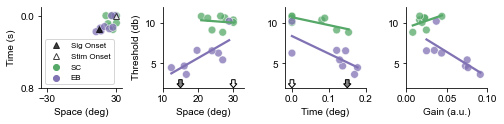

In [11]:
f, axs = plt.subplots(1,4)
f.set_size_inches(8,3)
plt.subplots_adjust(wspace=0.5, hspace=1)

dotsize = 60

# peak coordinates
plt.subplot(1,4,1)
plt.plot(onset[0], onset[1], 'k^', alpha=.75, label='Sig Onset')
plt.plot(stimonset[0], stimonset[1], 'k^', alpha=.75, label='Stim Onset', markerfacecolor='white')
sns.scatterplot(data=dat, x='xpeak', y='ypeak', hue='group', alpha=.75, ax=axs[0], palette=colorpalette, 
                s=dotsize, zorder=1)
plt.ylim([-0.1, 0.8])
plt.xlim([-35, 35])
plt.ylabel('Time (s)', fontsize=10);
plt.xlabel('Space (deg)', fontsize=10);
plt.xticks([-30,30], fontsize=10)
plt.yticks([0, 0.8], fontsize=10)
plt.gca().invert_yaxis()
plt.legend(title='', loc=3, prop={'size':8})
axs[0].set_aspect(1.0/axs[0].get_data_ratio(),adjustable='box')

# Amp correlation 
plt.subplot(1,4,4)
sns.regplot(data=dat[dat["group"]=="SC"], x="amp", y="AvgAlldb", ci=None, ax=axs[3], scatter=False)
sns.regplot(data=dat[dat["group"]=="EB"], x="amp", y="AvgAlldb", ci=None, ax=axs[3], scatter=False)
sns.scatterplot(data=dat, x='amp', y='AvgAlldb', hue='group', alpha=.75, legend=False, s=dotsize)
plt.ylim([2, 12])
plt.xlim([0, 0.1])
plt.yticks([5, 10], fontsize=10)
plt.xlabel('Gain (a.u.)', fontsize=10)
plt.ylabel('')
sns.set_palette(colorpalette)

axs[3].set_aspect(1.0/axs[3].get_data_ratio(),adjustable='box')

# Distance correlation
plt.subplot(1,4,2)
plt.arrow(x=onset[0], y=3, dx=0, dy=-0.5, width=1, head_length=0.5, head_width=2, facecolor='gray')
plt.arrow(x=stimonset[0], y=3, dx=0, dy=-0.5, width=1, head_length=0.5, head_width=2, facecolor='white')
sns.regplot(data=dat[dat["group"]=="SC"], x="xpeak", y="AvgAlldb", ci=None, ax=axs[1], scatter=False)
sns.regplot(data=dat[dat["group"]=="EB"], x="xpeak", y="AvgAlldb", ci=None, ax=axs[1], scatter=False)
sns.scatterplot(data=dat, x='xpeak', y='AvgAlldb', hue='group', alpha=.75, legend=False, s=dotsize)
plt.ylim([2, 12])
plt.xlim([10, 33])
plt.yticks([5, 10], fontsize=10)
plt.xlabel('Space (deg)', fontsize=10)
plt.ylabel('Threshold (db)', fontsize=10)
axs[1].set_aspect(1.0/axs[1].get_data_ratio(),adjustable='box')
sns.set_palette(colorpalette)

# Time correlation
plt.subplot(1,4,3)
plt.arrow(x=onset[1], y=3, dx=0, dy=-0.5, width=0.01, head_length=0.5, head_width=0.02, facecolor='gray')
plt.arrow(x=stimonset[1], y=3, dx=0, dy=-0.5, width=0.01, head_length=0.5, head_width=0.02, facecolor='white')
sns.regplot(data=dat[dat["group"]=="SC"], x="ypeak", y="AvgAlldb", ci=None, ax=axs[2], scatter=False)
sns.regplot(data=dat[dat["group"]=="EB"], x="ypeak", y="AvgAlldb", ci=None, ax=axs[2], scatter=False)
sns.scatterplot(data=dat, x='ypeak', y='AvgAlldb', hue='group', alpha=.75, legend=False, s=dotsize)
plt.ylim([2, 12])
plt.xlim([-0.02, 0.2])
plt.yticks([5, 10], fontsize=10)
plt.xticks([0, 0.1, 0.2], fontsize=10)
plt.xlabel('Time (deg)', fontsize=10)
plt.ylabel('')
axs[2].set_aspect(1.0/axs[2].get_data_ratio(),adjustable='box')
sns.set_palette(colorpalette)

sns.despine()
